## Credit Card Fraud Detection
### Aaryan Raaz
DataSet Link: https://www.kaggle.com/mlg-ulb/creditcardfraud.

# I. Imports

In [1]:
# Importing libraries
import numpy as np  # Importing the NumPy library for numerical computing
import pandas as pd  # Importing the Pandas library for data manipulation and analysis

import matplotlib.pyplot as plt  # Importing the Matplotlib library for data visualization
import seaborn as sns  # Importing the Seaborn library for advanced data visualization
pd.set_option('display.max_columns', None)  # Setting an option to display all columns in the DataFrame

# Importing dataset
dataset = pd.read_csv("creditcard.csv")  # Reading the CSV file into a DataFrame named 'dataset'

# II. Data Preprocessing

In [2]:
# Data observation

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checking the columns 

# Display summary information about the dataset, including column data types,
# non-null counts, and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Checking for null values

dataset.isnull().values.any()

False

In [5]:
# Checking the options in Class (Fraud) column

dataset['Class'].unique()

array([0, 1])

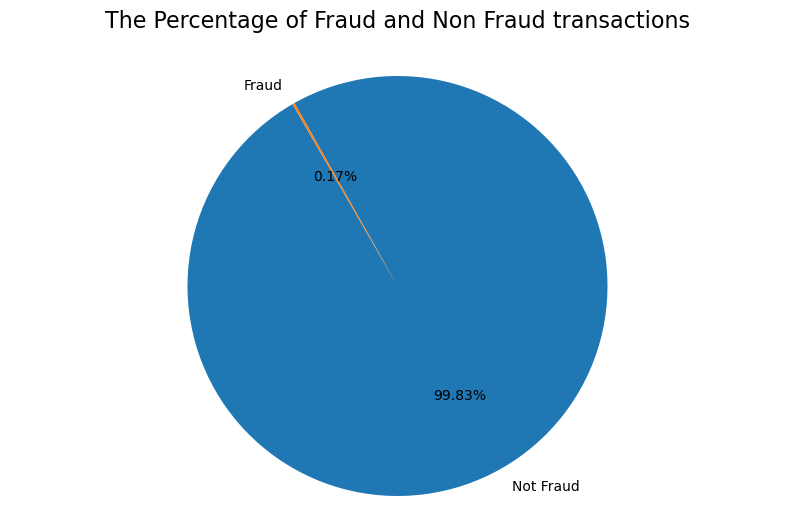

In [6]:
# Visualizing the amount of Fraud and Non Fraud transactions

## The percentage of Fraud and Non Fraud transactions chart

# Define the labels for the pie chart
labels = 'Not Fraud', 'Fraud'

# Calculate the count of Fraud and Non Fraud transactions in the dataset
sizes = [dataset.Class[dataset['Class']==0].count(), dataset.Class[dataset['Class']==1].count()]

# Create a new figure and axis for the pie chart
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Plot the pie chart with the calculated sizes and labels
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=120)

# Set the axis equal to make the pie chart a perfect circle
ax1.axis('equal')

# Set the title of the pie chart with added distance (pad) between the title and the chart
title = "The Percentage of Fraud and Non Fraud transactions"
plt.title(title, size=16, pad=20)  # You can change the pad value to adjust the distance

# Show the pie chart
plt.show()

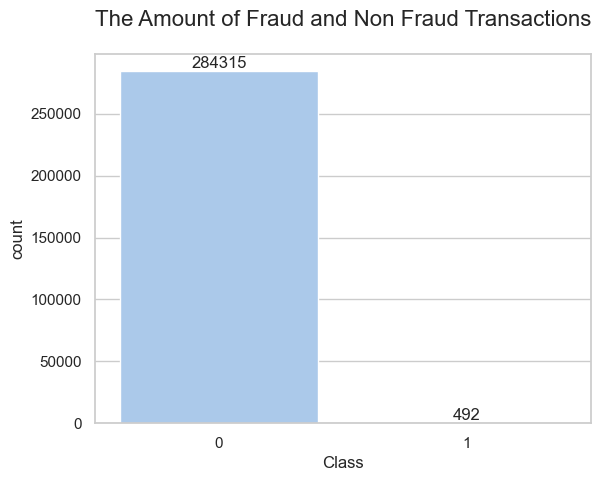

In [7]:
## Amount of Fraud and Non Fraud transactions plot

sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(x='Class', data=dataset, order=[0, 1], label='Count', palette='pastel')

# Calculate the counts of E-signed and Not E-signed customers
counts = dataset['Class'].value_counts()

# Add text annotations for the counts
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Set the title
title = "The Amount of Fraud and Non Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)

# Show the plot
plt.show()

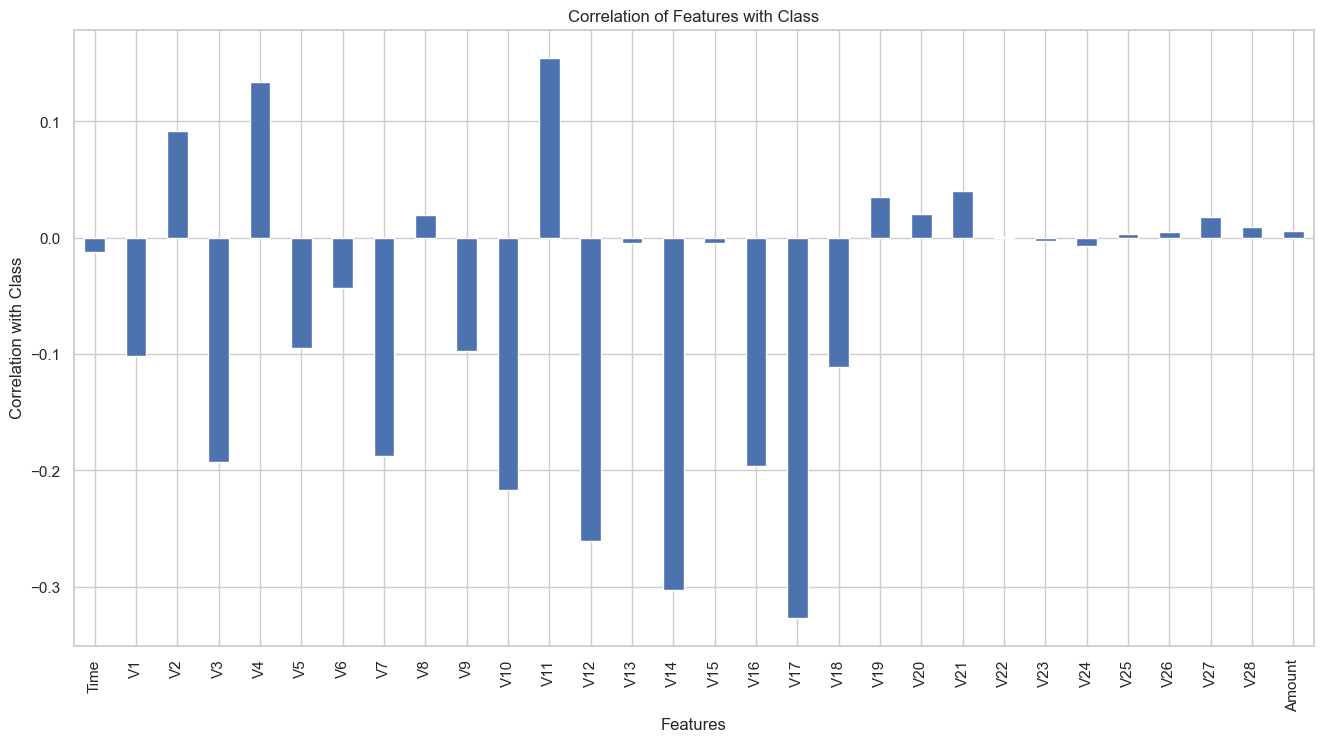

In [8]:
# Correlation Diagram

# Drop the 'Class' column from the original dataset and create a new DataFrame 'dataset_2'
dataset_2 = dataset.drop(columns=['Class'])

# Calculate the correlation between each column in 'dataset_2' and the 'Class' column in the original dataset
correlation_with_class = dataset_2.corrwith(dataset['Class'])

# Create a bar plot to visualize the correlation values with the 'Class' column
# Set the size of the figure to 16 inches (width) by 8 inches (height)
# Show grid lines in the plot for better readability
correlation_with_class.plot.bar(figsize=(16, 8), grid=True)

# Set appropriate labels and titles for the plot
plt.xlabel("Features")  # Label for the x-axis (features)
plt.ylabel("Correlation with Class")  # Label for the y-axis (correlation values)
plt.title("Correlation of Features with Class")  # Set the title for the bar plot

# Show the plot
plt.show()

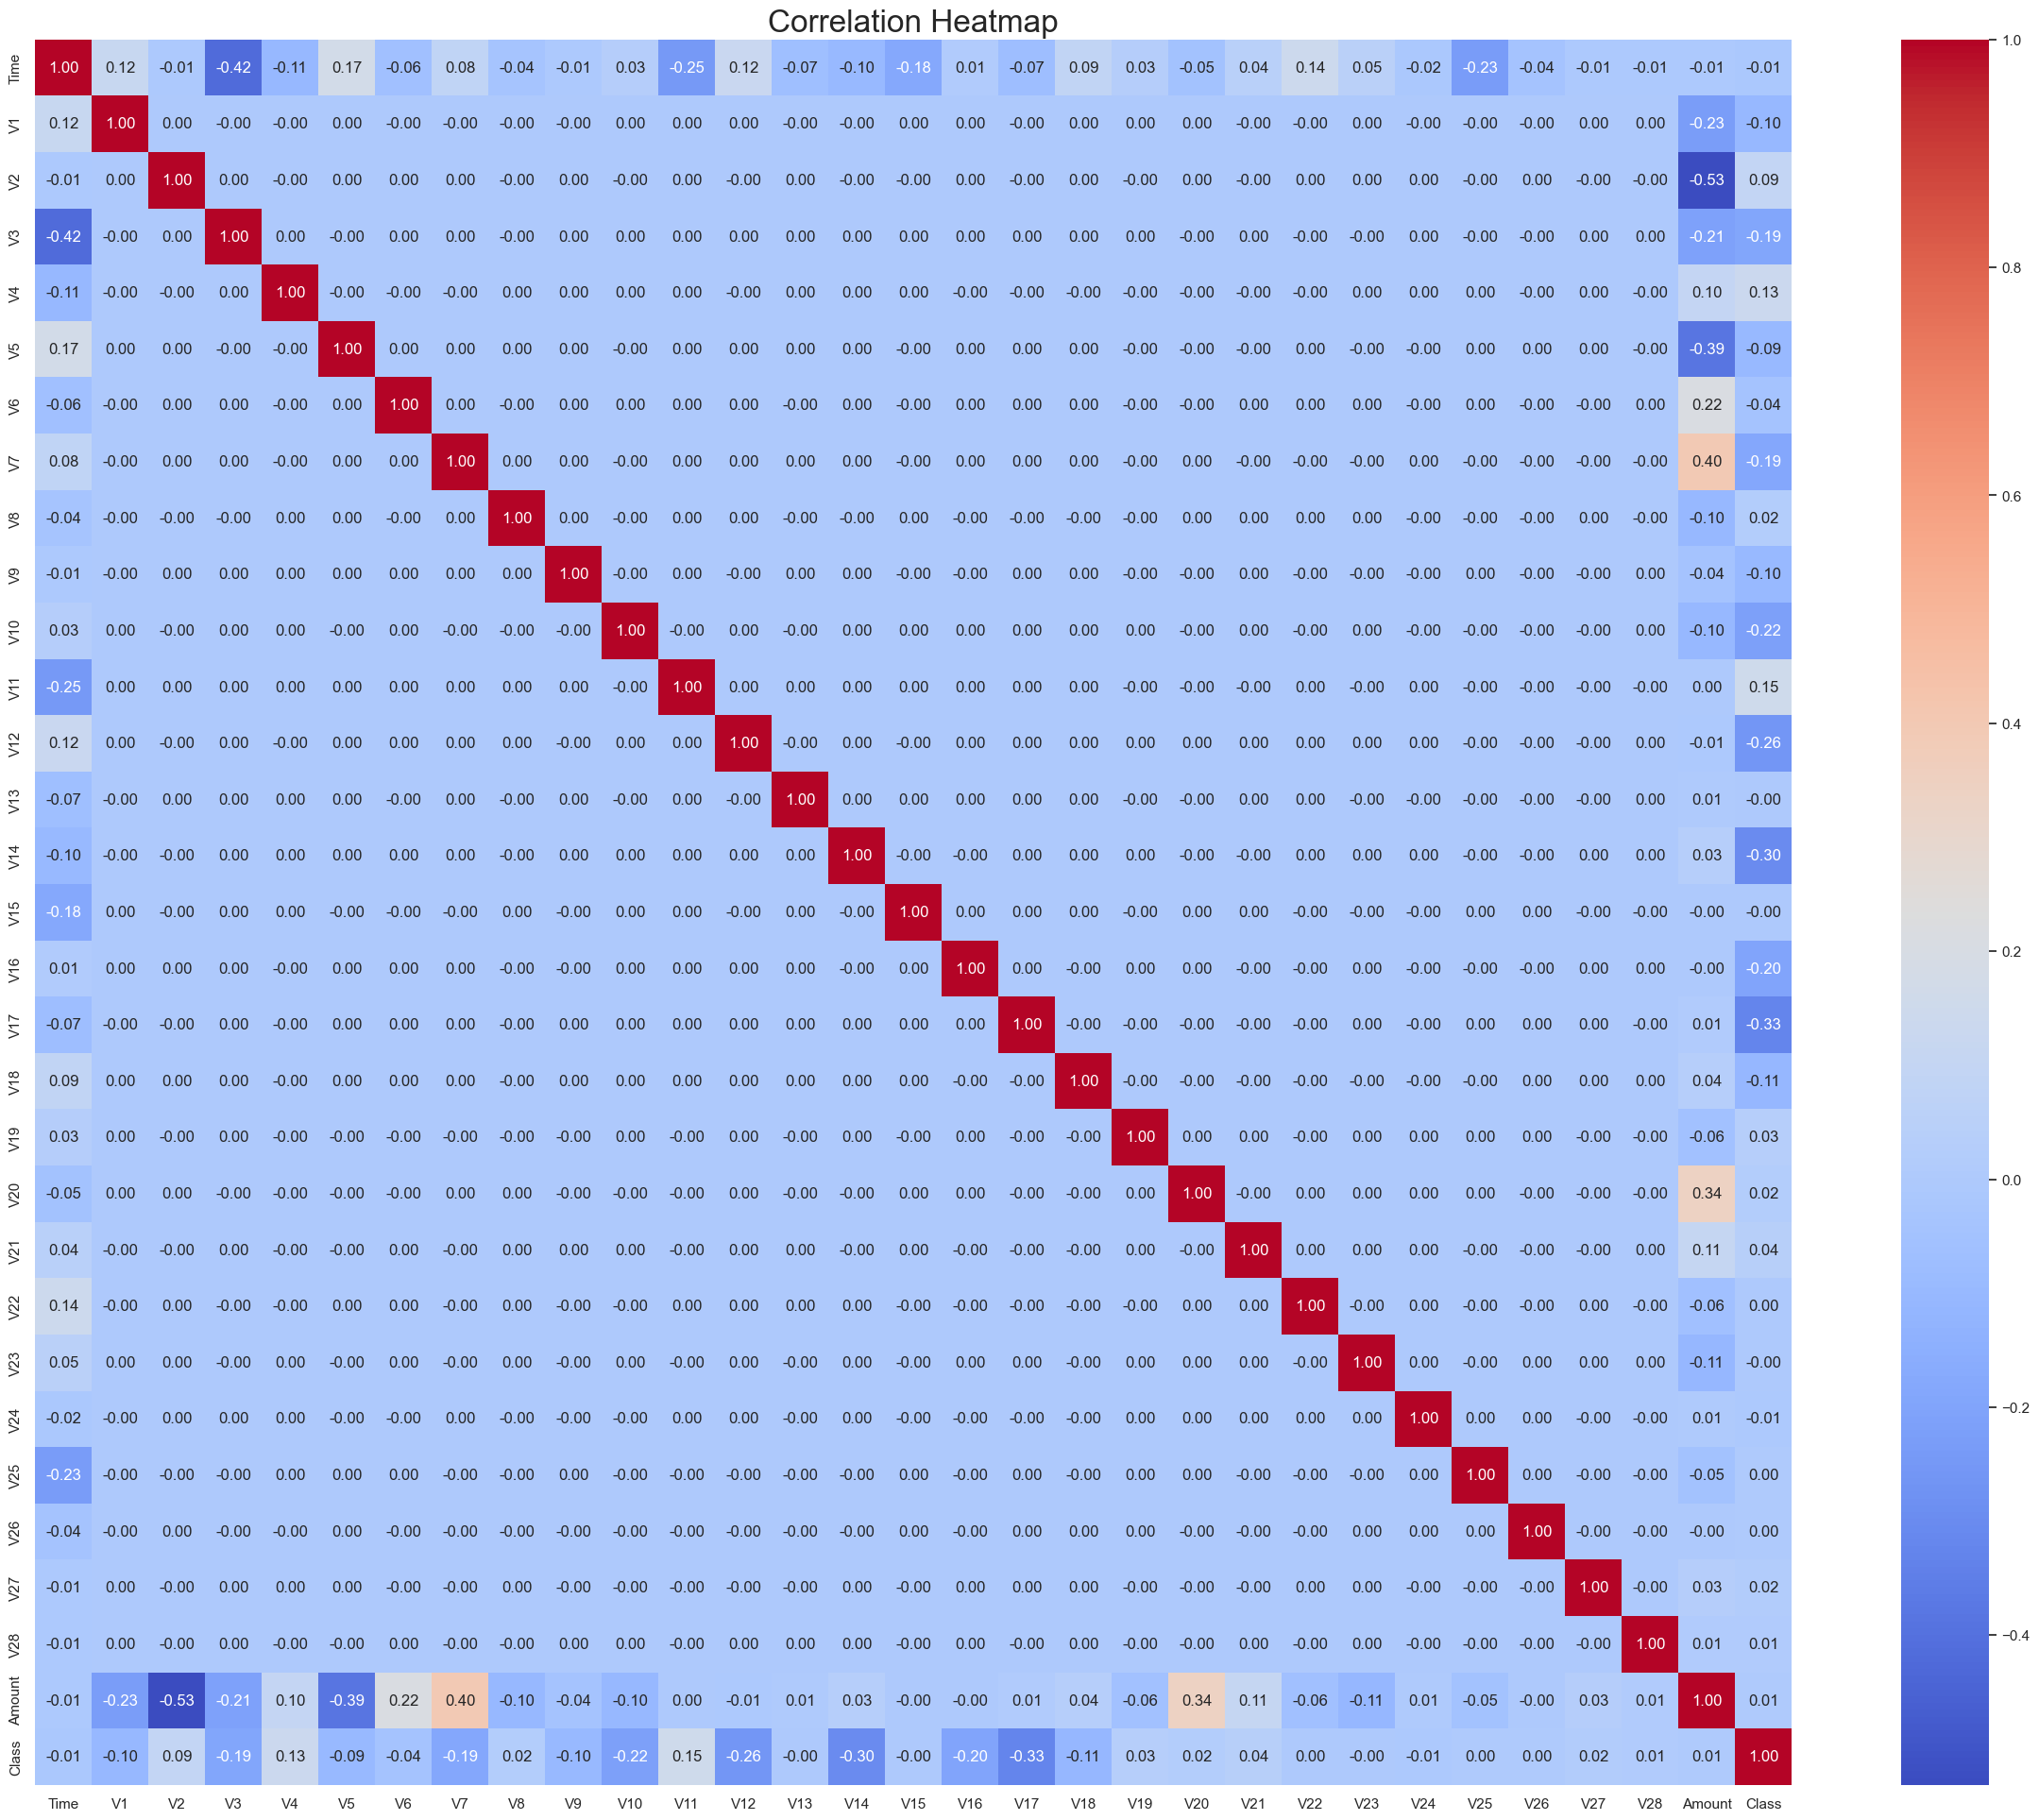

In [9]:
# Heatmap

# Calculate the correlation matrix for the dataset
corr = dataset.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(30, 24))

# Create the heatmap using seaborn
# 'annot=True' displays the correlation values on the heatmap
# 'cmap='coolwarm'' sets the color map for the heatmap
# 'fmt='.2f'' sets the format of the displayed correlation values to have two decimal places
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title for the heatmap
plt.title("Correlation Heatmap", fontsize=24)

# Show the heatmap
plt.show()

In [10]:
# Splitting the data 

# Separate the input features (X) and the target variable (y)
x = dataset.drop(columns=['Class']) # X contains all columns except 'Class'
y = dataset['Class'] # y contains only the 'Class' column, which is the target variable

In [11]:
# Splitting into testing and training sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [12]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [13]:
# Importing the logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Creating an instance of the logistic regression classifier
# Setting the random_state to ensure reproducibility of results
classifier_lr = LogisticRegression(random_state=0)

In [14]:
# Training the model

classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [15]:
# Making the prediction

y_pred = classifier_lr.predict(x_test)

In [16]:
# Loading the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Calculate accuracy using the predicted and true target values (y_pred and y_test)
acc = accuracy_score(y_test, y_pred)

# Calculate F1 score using the predicted and true target values (y_pred and y_test)
f1 = f1_score(y_test, y_pred)

# Calculate precision score using the predicted and true target values (y_pred and y_test)
prec = precision_score(y_test, y_pred)

# Calculate recall score using the predicted and true target values (y_pred and y_test)
rec = recall_score(y_test, y_pred)

In [17]:
# Getting the results

results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663


In [18]:
# Checking the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56852     9]
 [   37    64]]


# Random Forest Classifier

In [19]:
# Importing the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the RandomForestClassifier
# Setting the random_state to ensure reproducibility of results
classifier_rm = RandomForestClassifier(random_state=0)

In [20]:
# Training the model

classifier_rm.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
# Making the prediction

y_pred = classifier_rm.predict(x_test)

In [22]:
# Loading the metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [23]:
# Getting the results of Random Forest model fitting

model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663
1,Random Forest,0.999491,0.844920,0.918605,0.782178


In [24]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56854     7]
 [   22    79]]


# XGB Classifier

In [25]:
# Importing the XGBClassifier from XGBoost library
from xgboost import XGBClassifier

# Creating an instance of the XGBClassifier
# Setting the random_state to ensure reproducibility of results
classifier_xgb = XGBClassifier(random_state=0)

In [26]:
# Training the model

classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [27]:
# Making the prediction

y_pred = classifier_xgb.predict(x_test)

In [28]:
# Loading the metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [29]:
# Getting the results of traning


model_results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results = pd.concat([results, model_results], ignore_index=True)

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.999192,0.735632,0.876712,0.633663
1,Random Forest,0.999491,0.844920,0.918605,0.782178
2,XGBoost,0.999614,0.884211,0.943820,0.831683


In [30]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56856     5]
 [   17    84]]


In [31]:
# We have found out that the most effective model for us it XG Boost and we will use it for the next predictions

# Checking the predictions

In [32]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
# Creating the function for predicting the target based on the index we input:

def predict_single_observation(index, model, scaler):
    # Assuming 'x_train' is your original NumPy array with feature names
    # Define the feature names as a list excluding the target column 'Class'
    feature_names = dataset.columns.tolist()[:-1]

    # Create a DataFrame for the single observation with feature names
    single_obs_df = pd.DataFrame([dataset.loc[index, feature_names]])

    # Use the provided StandardScaler
    single_obs_scaled = scaler.transform(single_obs_df)

    # Predict using the transformed single observation
    prediction = model.predict(single_obs_scaled)
    return prediction[0]

In [34]:
# Example usage:
index_of_observation = 0   # Replace this with the index of the row you want to predict
prediction = predict_single_observation(index_of_observation, classifier_xgb, sc)
print(prediction)

0


In [35]:
# correct result

In [36]:
# Example usage:
index_of_observation = 2   # Replace this with the index of the row you want to predict
prediction = predict_single_observation(index_of_observation, classifier_xgb, sc)
print(prediction)

0


In [37]:
# correct result

In [38]:
# Now it is better to select the cases with fraud results and check of we can predict them
# Selecting the rows with fradulent cases

selected_rows = dataset[dataset['Class'] == 1].head(5)

selected_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [39]:
# Example usage:
index_of_observation = 6108   # Replace this with the index of the row you want to predict
prediction = predict_single_observation(index_of_observation, classifier_xgb, sc)
print(prediction)

1


In [40]:
# correct result

In [41]:
# Example usage:
index_of_observation = 6329   # Replace this with the index of the row you want to predict
prediction = predict_single_observation(index_of_observation, classifier_xgb, sc)
print(prediction)

1
